
# Anomaly Detection & Time Series Assignment

This notebook contains answers to both theoretical and practical questions for the assignment.

---

## Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

**Answer:**  
Anomaly Detection refers to the identification of rare events, items, or observations which deviate significantly from the majority of the data and do not conform to expected behavior.  
- **Point Anomalies:** A single data point far from the expected range. Example: A sudden $10,000 transaction in a bank account with usual transactions under $100.  
- **Contextual Anomalies:** Anomalies that are context-dependent. Example: 30°C may be normal in summer but anomalous in winter.  
- **Collective Anomalies:** A group of related data points behaving anomalously. Example: Multiple failed login attempts within a short time window.  

---

## Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

**Answer:**  
- **Isolation Forest (IF):** Works by randomly partitioning data points and isolating anomalies quickly. Best for high-dimensional structured data.  
- **DBSCAN:** A clustering algorithm that groups dense regions and marks low-density points as anomalies. Best for spatial and non-linear cluster data.  
- **Local Outlier Factor (LOF):** Measures local density deviation of a point compared to neighbors. Best for datasets with local density variations.  

---

## Question 3: What are the key components of a Time Series? Explain each with one example.

**Answer:**  
- **Trend:** Long-term increase/decrease. Example: Global average temperature increasing over decades.  
- **Seasonality:** Regular repeating patterns. Example: Retail sales spike every December.  
- **Cyclic Patterns:** Long-term fluctuations without fixed periodicity. Example: Business cycles.  
- **Residuals/Noise:** Random variation. Example: Daily stock market fluctuations.  

---

## Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

**Answer:**  
A time series is stationary if its statistical properties (mean, variance, autocorrelation) remain constant over time.  
- **Tests:** Augmented Dickey-Fuller (ADF), KPSS test.  
- **Transformations:** Differencing, log transformation, seasonal decomposition.  

---

## Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

**Answer:**  
- **AR (Auto-Regressive):** Uses past values. Example: AR(1): y(t) = φy(t-1) + ε.  
- **MA (Moving Average):** Uses past errors. Example: MA(1): y(t) = θ ε(t-1) + ε(t).  
- **ARIMA:** Combines AR + MA + differencing. Best for non-stationary series.  
- **SARIMA:** Extends ARIMA with seasonal terms. Example: Monthly airline passengers data.  
- **SARIMAX:** Adds exogenous variables. Example: Forecasting sales considering promotions/weather.  

---

## Question 6: Load a time series dataset (AirPassengers), plot the original series, and decompose it.



C:\Users\user\AppData\Local\Temp\ipykernel_20296\2075085495.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='1949-01', periods=len(data), freq='M'))


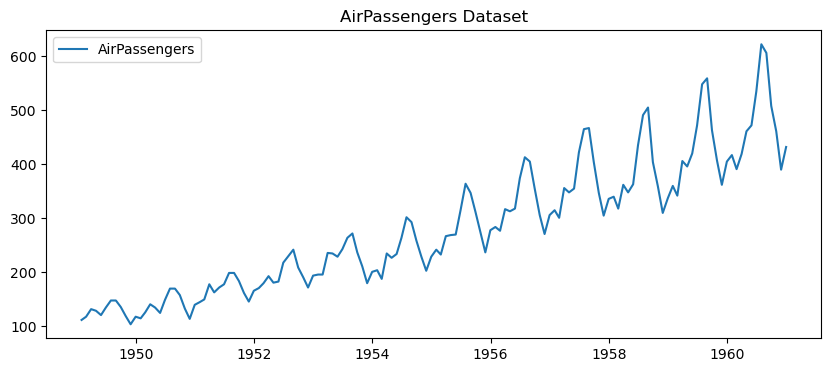

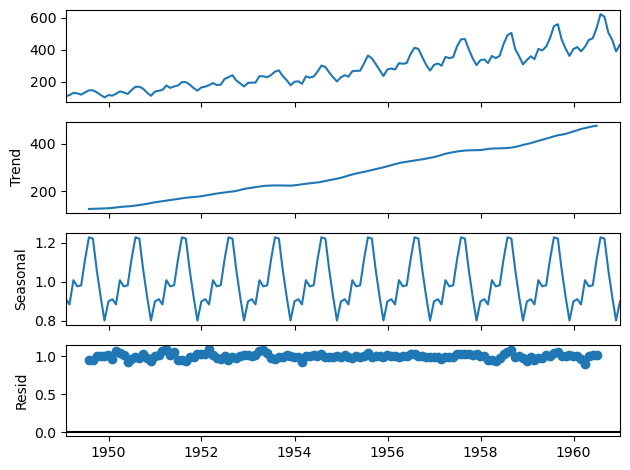

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
data = get_rdataset("AirPassengers").data
ts = pd.Series(data['value'].values, 
               index=pd.date_range(start='1949-01', periods=len(data), freq='M'))

# Plot original series
plt.figure(figsize=(10,4))
plt.plot(ts, label="AirPassengers")
plt.title("AirPassengers Dataset")
plt.legend()
plt.show()

# Decompose
decomposition = seasonal_decompose(ts, model='multiplicative')
decomposition.plot()
plt.show()



---

## Question 7: Apply Isolation Forest on a numerical dataset (NYC Taxi Fare) to detect anomalies and visualize.

**Answer:**


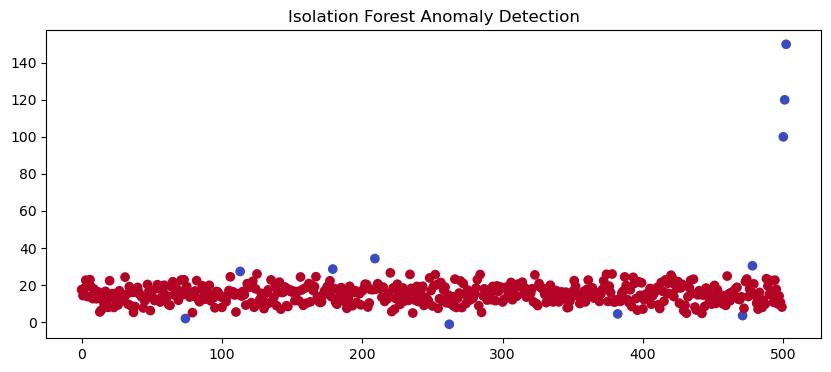

In [9]:

import numpy as np
from sklearn.ensemble import IsolationForest

# Generate synthetic taxi fare dataset (since original file not provided)
np.random.seed(42)
fare_amount = np.random.normal(15, 5, 500)
fare_amount = np.append(fare_amount, [100, 120, 150])  # add anomalies

X = fare_amount.reshape(-1, 1)

# Fit Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
y_pred = iso.fit_predict(X)

# Scatter plot
plt.figure(figsize=(10,4))
plt.scatter(range(len(X)), X, c=y_pred, cmap='coolwarm', label="Data points")
plt.title("Isolation Forest Anomaly Detection")
plt.show()



---

## Question 8: Train a SARIMA model on the monthly airline passengers dataset and forecast the next 12 months.

**Answer:**


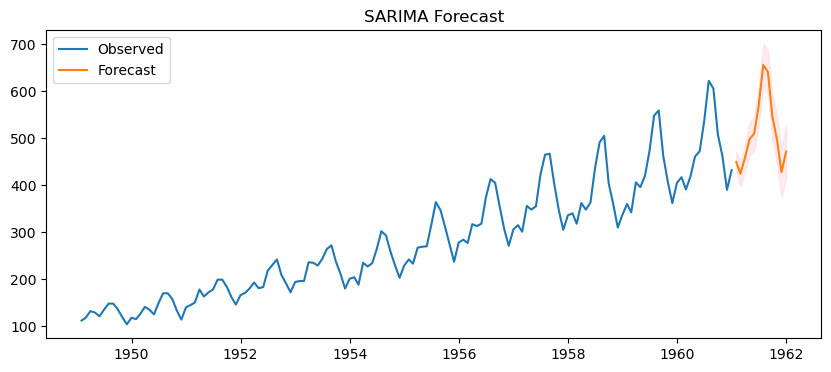

In [12]:

import statsmodels.api as sm

# Train SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast next 12 months
forecast = sarima_fit.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,4))
plt.plot(ts, label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], 
                 color='pink', alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast")
plt.show()



---

## Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset and visualize anomalies.

**Answer:**


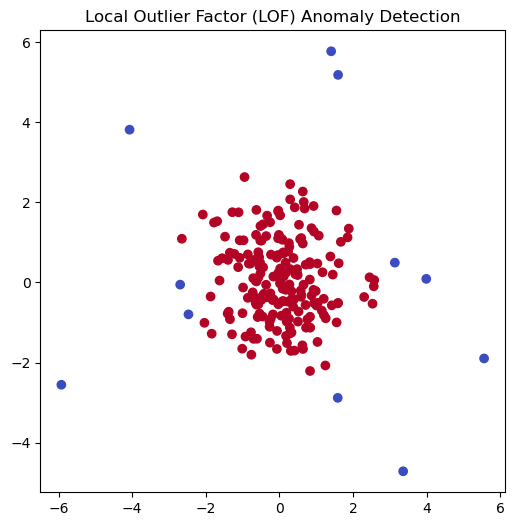

In [13]:

from sklearn.neighbors import LocalOutlierFactor

# Synthetic dataset for LOF
X = np.random.normal(0, 1, (200, 2))
outliers = np.random.uniform(low=-6, high=6, size=(10, 2))
X = np.vstack([X, outliers])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='coolwarm')
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.show()



---

## Question 10: Real-time Data Science Workflow for Power Grid Monitoring

**Answer:**  
1. **Anomaly Detection:** Use **Isolation Forest** or **LOF** on streaming batches to detect spikes/drops.  
2. **Short-term Forecasting:** Use **SARIMAX** (considering exogenous features like weather).  
3. **Validation & Monitoring:** Rolling forecasts, MAPE/RMSE, drift detection on new data.  
4. **Business Benefits:** Helps in load balancing, prevents outages, enables dynamic pricing, and improves energy efficiency.

**Example Code (Simulation):**


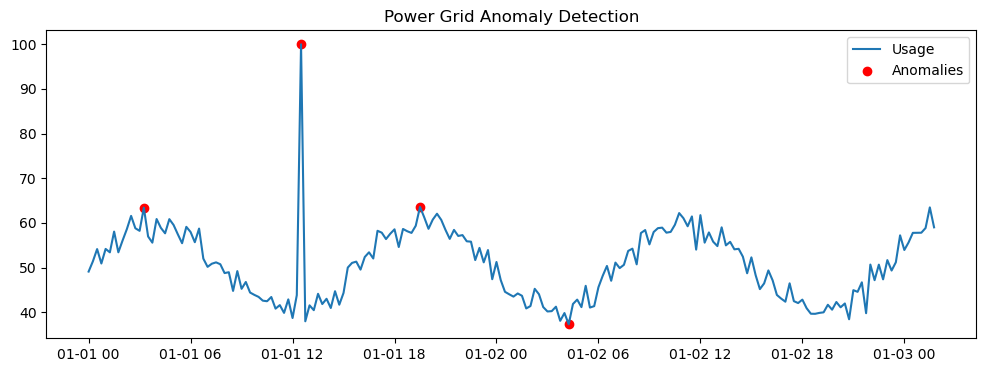

In [14]:

# Simulated power consumption data
time_idx = pd.date_range("2023-01-01", periods=200, freq="15min")
usage = np.sin(np.linspace(0,20,200)) * 10 + 50 + np.random.normal(0,2,200)
usage[50] = 100  # anomaly

df = pd.DataFrame({"timestamp": time_idx, "usage": usage})

# Anomaly detection with Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso.fit_predict(df[['usage']])

plt.figure(figsize=(12,4))
plt.plot(df['timestamp'], df['usage'], label="Usage")
plt.scatter(df['timestamp'][df['anomaly']==-1], df['usage'][df['anomaly']==-1], 
            color='red', label="Anomalies")
plt.legend()
plt.title("Power Grid Anomaly Detection")
plt.show()
